In [69]:
#This is a proof of concept for ATL and Chiroptera correspondence matching.
#gt3r will be 11m x seg_distm windows with segment height representations
import pandas as pd
import numpy as np
import rasterio 

atl_df = pd.read_csv('unshifted_gt3r_full.csv')

length = atl_df['seg_dist']

dx = atl_df['x'].diff()
dy = atl_df['y'].diff()

angle_radians = np.arctan2(dy, dx)

width = 11 # footprint
x0, y0 = atl_df['x'], atl_df['y']
x1 = x0 - (length / 2) * np.cos(angle_radians) + (width / 2) * np.sin(angle_radians)
y1 = y0 - (length / 2) * np.sin(angle_radians) - (width / 2) * np.cos(angle_radians)
x2 = x0 + (length / 2) * np.cos(angle_radians) + (width / 2) * np.sin(angle_radians)
y2 = y0 + (length / 2) * np.sin(angle_radians) - (width / 2) * np.cos(angle_radians)
x3 = x0 + (length / 2) * np.cos(angle_radians) - (width / 2) * np.sin(angle_radians)
y3 = y0 + (length / 2) * np.sin(angle_radians) + (width / 2) * np.cos(angle_radians)
x4 = x0 - (length / 2) * np.cos(angle_radians) - (width / 2) * np.sin(angle_radians)
y4 = y0 - (length / 2) * np.sin(angle_radians) + (width / 2) * np.cos(angle_radians)

atl_df['x1'] = x1
atl_df['y1'] = y1
atl_df['x2'] = x2
atl_df['y2'] = y2
atl_df['x3'] = x3
atl_df['y3'] = y3
atl_df['x4'] = x4
atl_df['y4'] = y4
atl_df

,x,y,slope,heights,dt,seg_dist_x,seg_dist,prev_seg_dist,next_seg_dist,conf,...,lpe,ib,x1,y1,x2,y2,x3,y3,x4,y4
0,1.389962e+06,1.248725e+07,NaN,3.402823e+38,1.440881e+08,7.401663e+06,NaN,NaN,NaN,3.402823e+38,...,3.402823e+38,0.070184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.389830e+06,1.248664e+07,4.642218,3.402823e+38,1.440881e+08,7.402279e+06,616.571113,NaN,308.285557,3.402823e+38,...,3.402823e+38,0.070263,1.389890e+06,1.248695e+07,1.389760e+06,1.248634e+07,1.389771e+06,1.248634e+07,1.389901e+06,1.248694e+07
2,1.389805e+06,1.248653e+07,4.638447,3.402823e+38,1.440881e+08,7.402400e+06,121.046848,308.285557,60.523424,3.402823e+38,...,3.402823e+38,0.070278,1.389812e+06,1.248659e+07,1.389787e+06,1.248647e+07,1.389797e+06,1.248646e+07,1.389823e+06,1.248658e+07
3,1.389800e+06,1.248650e+07,4.632857,3.402823e+38,1.440881e+08,7.402421e+06,21.077066,60.523424,10.538533,3.402823e+38,...,3.402823e+38,0.070281,1.389797e+06,1.248652e+07,1.389793e+06,1.248650e+07,1.389803e+06,1.248649e+07,1.389808e+06,1.248651e+07
4,1.389800e+06,1.248650e+07,4.631779,3.402823e+38,1.440881e+08,7.402424e+06,2.845787,10.538533,1.422894,3.402823e+38,...,3.402823e+38,0.070281,1.389795e+06,1.248650e+07,1.389794e+06,1.248650e+07,1.389805e+06,1.248650e+07,1.389805e+06,1.248650e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88035,1.490373e+04,7.862173e+06,2.843844,3.402823e+38,1.440888e+08,1.221924e+07,802.647587,57.882595,401.323793,3.402823e+38,...,4.806372e-02,0.009478,1.503167e+04,7.862554e+06,1.476541e+04,7.861797e+06,1.477579e+04,7.861793e+06,1.504205e+04,7.862550e+06
88036,1.462746e+04,7.861388e+06,2.844270,3.402823e+38,1.440888e+08,1.222007e+07,830.934990,401.323793,415.467495,3.402823e+38,...,4.806372e-02,0.009429,1.476007e+04,7.861781e+06,1.448447e+04,7.860997e+06,1.449484e+04,7.860994e+06,1.477045e+04,7.861778e+06
88037,1.455137e+04,7.861171e+06,2.840777,3.402823e+38,1.440888e+08,1.222030e+07,228.603574,415.467495,114.301787,3.402823e+38,...,4.806372e-02,0.009415,1.458413e+04,7.861281e+06,1.450823e+04,7.861065e+06,1.451860e+04,7.861062e+06,1.459451e+04,7.861277e+06
88038,1.433769e+04,7.860565e+06,2.839517,3.402823e+38,1.440888e+08,1.222095e+07,641.712743,114.301787,320.856371,3.402823e+38,...,4.806372e-02,0.009377,1.443908e+04,7.860869e+06,1.422592e+04,7.860264e+06,1.423630e+04,7.860260e+06,1.444946e+04,7.860866e+06


In [6]:
from shapely.geometry import Polygon
import geopandas as gpd
import pandas as pd

atl_df = pd.read_csv('gt3r_with_xy1234.csv')

for i in range(0,8):
    b1 = i * 4
    b2 = b1 + 4
    chirop04 = pd.read_pickle(f'../data/1C/10 1C/{b1}m_{b2}m.pkl')

    x_min = min(chirop04['x'])
    x_max = max(chirop04['x'])
    y_min = min(chirop04['y'])
    y_max = max(chirop04['y'])

    print(f'{x_min}: {x_max - x_min}')
    # box = np.array([[x_min, y_min], [x_min, y_max], [x_max, y_min], [x_max, y_max]])
    # np.savetxt('box.txt', box)
    sliced_atl_df = atl_df[(atl_df['x'] >= x_min) & (atl_df['x'] <= x_max)]
    #what we'd like to do: create a raster with the corresponding color band out of 8
    print(len(sliced_atl_df))

    shp_polygons = []
    def create_shp_polygon(row):
        polygon = Polygon([[row['x1'], row['y1']], [row['x2'], row['y2']], [row['x3'], row['y3']], [row['x4'], row['y4']]])
        return polygon

    for index, row in sliced_atl_df.iterrows():
        shp_polygons.append(create_shp_polygon(row))

    heights = list(sliced_atl_df['heights'])
    print(heights)
    gdf = gpd.GeoDataFrame(crs='epsg:32616', geometry=shp_polygons)  
    gdf['heights'] = heights
    gdf.to_file(f'atl 1C/atl_{b1}_{b2}.json', driver="GeoJSON")  

569358.0299999999: 1761.9299999999348
905
[0.03533554, -0.028831482, -0.09171486, -0.026857376, 0.22107697, 0.44054794, 0.4223442, 0.7122097, 0.88368416, 0.7707157, 0.5270767, 0.17230988, 0.064310074, -0.19177246, 0.0011844635, 0.046491623, 0.019901276, 0.0041065216, 0.12836647, 0.4896717, 0.49292755, 0.40478897, 0.4349804, 0.4304638, 0.6108036, 0.91931343, 0.36326027, -0.12776566, -0.16422653, -0.14441681, -0.1391449, -0.13299179, -0.14024925, -0.14040184, -0.09824753, -0.03246689, 0.03752327, -0.029407501, -0.13485146, -0.15773773, 0.17141914, 0.74289894, 1.0763721, 0.36700058, 0.2587185, 0.29673004, 0.18336868, 0.045864105, -0.013500214, -0.02624321, -0.042036057, 0.39237785, 0.44654846, 0.53105164, 0.53647995, 0.3361702, 0.2276535, 0.23028946, 0.25086975, 0.18945503, 0.1948471, 0.06000328, -0.11951065, -0.1540165, -0.17010117, -0.17098045, -0.08476257, 0.13033104, 0.38710022, 0.41719627, 0.116521835, 0.0007534027, 0.027891159, 0.13947678, 0.07439995, -0.02995491, -0.06671715, -0.07

In [37]:
import rasterio
from rasterio import features
from rasterio.transform import from_origin
import geopandas as gpd
import numpy as np


for i in range(0, 8):
    b1 = i * 4
    b2 = b1 + 4
    #Rasterize geojson
    gdf = gpd.read_file(f'atl 1C/atl json/atl_{b1}_{b2}.json')
    pixel_size = 1
    xmin, ymin, xmax, ymax = gdf.total_bounds
    height, width = int((ymax - ymin)), int((xmax - xmin))

    print(f'{ymin}')
    #print(f'{xmax - xmin} {ymax - ymin}')
    transform = from_origin(xmin, ymax, pixel_size, pixel_size)

    heights = gdf['heights'].clip(upper=5)
    scaled_heights = ((heights - heights.min()) / (heights.max() - heights.min()) * 255).astype(int)
    heights = scaled_heights.astype(np.uint8)

    image = np.zeros((height, width), dtype=np.uint8)

    features.rasterize(
        [(geom, height) for geom, height in zip(gdf.geometry, heights)],
        out=image,
        transform=transform,
        fill=0,
        all_touched=True,
        default_value=0
    )
    # Write the raster image to a file
    with rasterio.open(f'atl 1C/atl jpg/atl_{b1}_{b2}.jpg', 'w', driver='GTiff', width=width, height=height, count=1, dtype=np.uint8, transform=transform) as dst:
        dst.write(image, 1)

9492809.986729298
9497038.91070138
9501081.774589552
9504820.072214285
9508605.184991634
9512404.439355925
9516092.145272557
9520037.375841152


(2000, 1771)
(2000, 1714)
(2000, 1618)
(2000, 1637)
(2000, 1647)
(2000, 1606)
(2000, 1687)
(2000, 1590)


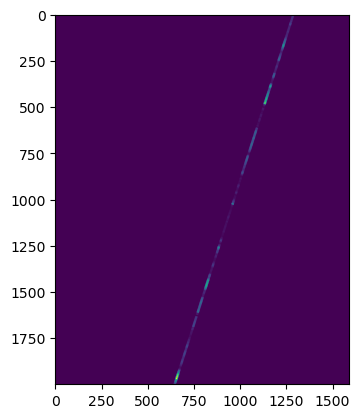

In [17]:
#ROTATE AND CROP IMAGERY

ROT = 17.88

L_SHIFT = 2
R_SHIFT = -2
import os
from scipy import ndimage
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
# chirop_lens = []
# chirop_paths = os.listdir('chirop_jpg')

# for i in range(0, 8):
#     b1 = i * 4
#     b2 = b1 + 4
#     chirop = cv2.imread(f'chirop_jpg/chirop_{b1}_{b2}.jpg',cv2.IMREAD_GRAYSCALE)
#     #print(len(chirop))
#     chirop_lens.append(len(chirop))

def get_lr_bounds(arr):
    leftmost = np.inf
    rightmost = 0
    for row in arr:
        if np.count_nonzero(row) > 0:
            local_left = np.min(np.nonzero(row))
            local_right = np.max(np.nonzero(row))
            if local_left < leftmost:
                leftmost = local_left
            if local_right > rightmost:
                rightmost = local_right
    return (leftmost, rightmost)

for i in range(0, 8):
    b1 = i * 4
    b2 = b1 + 4
    path = f'atl 1C/atl jpg/atl_{b1}_{b2}.jpg'
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    #crop anything out of 2000:4000 range (w.r.t. ymin)
    image = image[-4000:-2000,:]
    plt.imshow(image)
    print(image.shape)
    rot_image = rotate_image(image, ROT)
    im3 = Image.fromarray(rot_image)
    im3 = im3.convert("L")
    im3.save(f'atl 1C/atl_{i}_{i+4}_rot.jpg')
    #This is an interesting bug with boundingRect, it fails to crop sections
    # if ROT < 0:
    #     L_SHIFT,R_SHIFT = int(abs(ROT) * 20), 0
    # else:
    #     L_SHIFT, R_SHIFT = 0, int(abs(ROT) * 20)
    #new method for identifying boundingRect
    # x,y,w,h = cv2.boundingRect(rot_image)
    # cropped_img = rot_image[2000:,x+R_SHIFT:x+R_SHIFT+10]

    (leftmost, rightmost) = get_lr_bounds(rot_image)
    rot_90_image = np.rot90(rot_image, 1)
    (top, bottom) = get_lr_bounds(rot_90_image)

    cropped_img = rot_image[top:bottom,leftmost+5:rightmost-4]
    
    im3 = Image.fromarray(cropped_img)
    im3 = im3.convert("L")
    im3.save(f'atl 1C/atl jpg rot/atl_{b1}_{b2}.jpg')

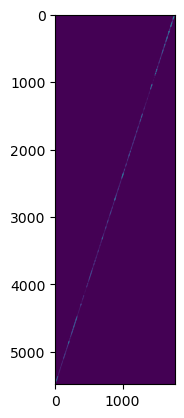

In [14]:
b1 = 0 * 4
b2 = b1 + 4
path = f'atl 1C/atl jpg/atl_{b1}_{b2}.jpg'
image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#crop anything out of 2000:4000 range (w.r.t. ymin)
plt.imshow(image)

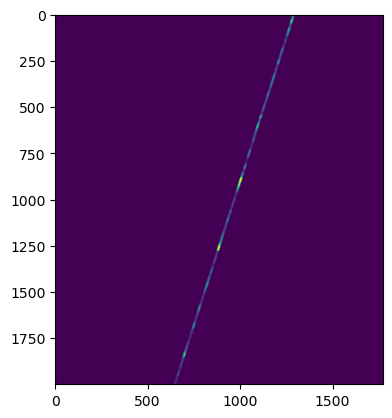

In [15]:
image = image[-4000:-2000,:]
plt.imshow(image)

In [14]:
for i in range(0, 32, 4):
    path = f'atl_jpg/atl_{i}_{i+4}.jpg'
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

[ WARN:0@2150.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('atl_jpg/atl_0_4.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2150.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('atl_jpg/atl_4_8.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2150.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('atl_jpg/atl_8_12.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2150.061] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('atl_jpg/atl_12_16.jpg'): can't open/read file: check file path/integrity
[ WARN:0@2150.061] global /Users/xperience/actions-runner/_work/openc

In [4]:
def rotate_image(mat, angle):
    """
    Rotates an image (angle in degrees) and expands image to avoid cropping
    """
    
    height, width = mat.shape[:2] # image shape has 3 dimensions
    image_center = (width/2, height/2) # getRotationMatrix2D needs coordinates in reverse order (width, height) compared to shape
    
    rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)
    
    # rotation calculates the cos and sin, taking absolutes of those.
    abs_cos = abs(rotation_mat[0,0]) 
    abs_sin = abs(rotation_mat[0,1])
    
    # find the new width and height bounds
    bound_w = int(height * abs_sin + width * abs_cos)
    bound_h = int(height * abs_cos + width * abs_sin)
    
    # subtract old image center (bringing image back to origo) and adding the new image center coordinates
    rotation_mat[0, 2] += bound_w/2 - image_center[0]
    rotation_mat[1, 2] += bound_h/2 - image_center[1]
    
    # rotate image with the new bounds and translated rotation matrix
    rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
    return rotated_mat

In [1]:
#Scales ATL images to the corresponding Chiroptera image height. (˜2000 -> 4000)
#Actually, this is wrong. 
# import cv2
# import os 

# chirop_lens = []
# chirop_paths = os.listdir('chirop_jpg')

# for i in range(0, 8):
#     b1 = i * 4
#     b2 = b1 + 4
#     chirop = cv2.imread(f'chirop_jpg/chirop_{b1}_{b2}.jpg',cv2.IMREAD_GRAYSCALE)
#     print(len(chirop))
#     chirop_lens.append(len(chirop))
# chirop_lens

# for i in range(0, 8):
#     b1 = i * 4
#     b2 = b1 + 4
#     path = f'atl_jpg/atl_{b1}_{b2}.jpg'
#     image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
#     width = image.shape[1]
#     #resize takes x and then y
#     res = cv2.resize(image, dsize=(width, chirop_lens[i]), interpolation=cv2.INTER_CUBIC)
#     res = res[0:2000, :]
#     res = Image.fromarray(res)
#     res.save(f'atl_jpg_resized/atl_{b1}_{b2}.jpg')

FileNotFoundError: [Errno 2] No such file or directory: 'chirop_jpg'

In [ ]:
import os
import pandas as pd
import rasterio
import numpy as np

#Want to create ATL image for chirop segments...

def check(p1, p2, base_array):
    """
    Uses the line defined by p1 and p2 to check array of 
    input indices against interpolated value

    Returns boolean array, with True inside and False outside of shape
    """
    idxs = np.indices(base_array.shape) # Create 3D array of indices

    p1 = p1.astype(float)
    p2 = p2.astype(float)

    # Calculate max column idx for each row idx based on interpolated line between two points
    max_col_idx = (idxs[0] - p1[0]) / (p2[0] - p1[0]) * (p2[1] - p1[1]) +  p1[1]    
    sign = np.sign(p2[0] - p1[0])
    return idxs[1] * sign <= max_col_idx * sign

#create polygon and reference x y for each one value 

def create_polygon(shape, vertices):
    """
    Creates np.array with dimensions defined by shape
    Fills polygon defined by vertices with ones, all other values zero"""
    base_array = np.zeros(shape, dtype=np.int8)  # Initialize your array of zeros
    fill = np.ones(base_array.shape) * True  # Initialize boolean array defining shape fill
    # Create check array for each edge segment, combine into fill array
    for k in range(vertices.shape[0]):
        fill = np.all([fill, check(vertices[k-1], vertices[k], base_array)], axis=0)
    # Set all values inside polygon to one
    base_array[fill] = 1
    return base_array

#Inputs: an image and a coordinate
#Returns: a boolean for whether the coordinate is in the geotiff
def in_bbox(image, coord):
    bounds = image.bounds
    if  (coord[0] > bounds.left 
        and coord[0] < bounds.right 
        and coord[1] > bounds.bottom 
        and coord[1] < bounds.top):
        return True
    else:
        return False

#This should be constructing an array for the row representing the correct values
#1 cell represents 1 meter 
def create_polygons_from_rows(rows):
    xcoords, ycoords,vatcoords = [],[],[]
    #1 value per row
    for i, row in enumerate(rows):
        value = int(row.stype)
        x1, y1, x2, y2, x3, y3, x4, y4 = row.x1, row.y1, row.x2, row.y2, row.x3, row.y3, row.x4, row.y4
        x_min = int(min(x1, x2, x3, x4))
        y_min = int(min(y1, y2, y3, y4))
        x1,x2,x3,x4 = x =  (np.array([x1,x2,x3,x4]) - x_min).astype(int)
        y1,y2,y3,y4 = y = (np.array([y1,y2,y3,y4]) - y_min).astype(int)
        #print(f'{x1},{y1}\n{x2},{y2}\n{x3},{y3}\n{x4},{y4}')
        arr = create_polygon([max(x) + 2,max(y) + 2], np.array([[x1, y1], [x4, y4], [x3, y3], [x2, y2]]))
        # print(f'{x} {y}: {min_x} {min_y} {max_x} {max_y}')
        #The above creates a polygon with (0,0) starting point
        #this changes the polygon to (x_min, y_min) starting point
        xs = list((np.where(arr == 1)[0] + x_min))
        ys = list((np.where(arr == 1)[1] + y_min))
        values = [value] * len(xs)
        xcoords.extend(xs)
        ycoords.extend(ys)
        vatcoords.extend(values)
    return [xcoords, ycoords, vatcoords]


#now do this for all rows..
[xcoords, ycoords, vatcoords] = create_polygons_from_rows([atl_df.iloc[47101], atl_df.iloc[47102]])
# np.savetxt('arr.txt', np.array(l))

In [42]:
import pandas as pd
for i in range(0,8):
    b1 = i*4
    b2 = b1 + 4
    m = pd.read_pickle(f'../data/1C/10 1C/{b1}m_{b2}m.pkl')
    m.to_csv(f'1C_chirop_{b1}_{b2}.csv', index=False)